<a href="https://colab.research.google.com/github/wang550086/learn_PyGMT01/blob/main/pygmt_0_17_0_googlecolab_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [ ]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

✨🍰✨ Everything looks OK!


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [ ]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

In [ ]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.4
  pandas: 2.3.3
  xarray: 2025.10.1
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


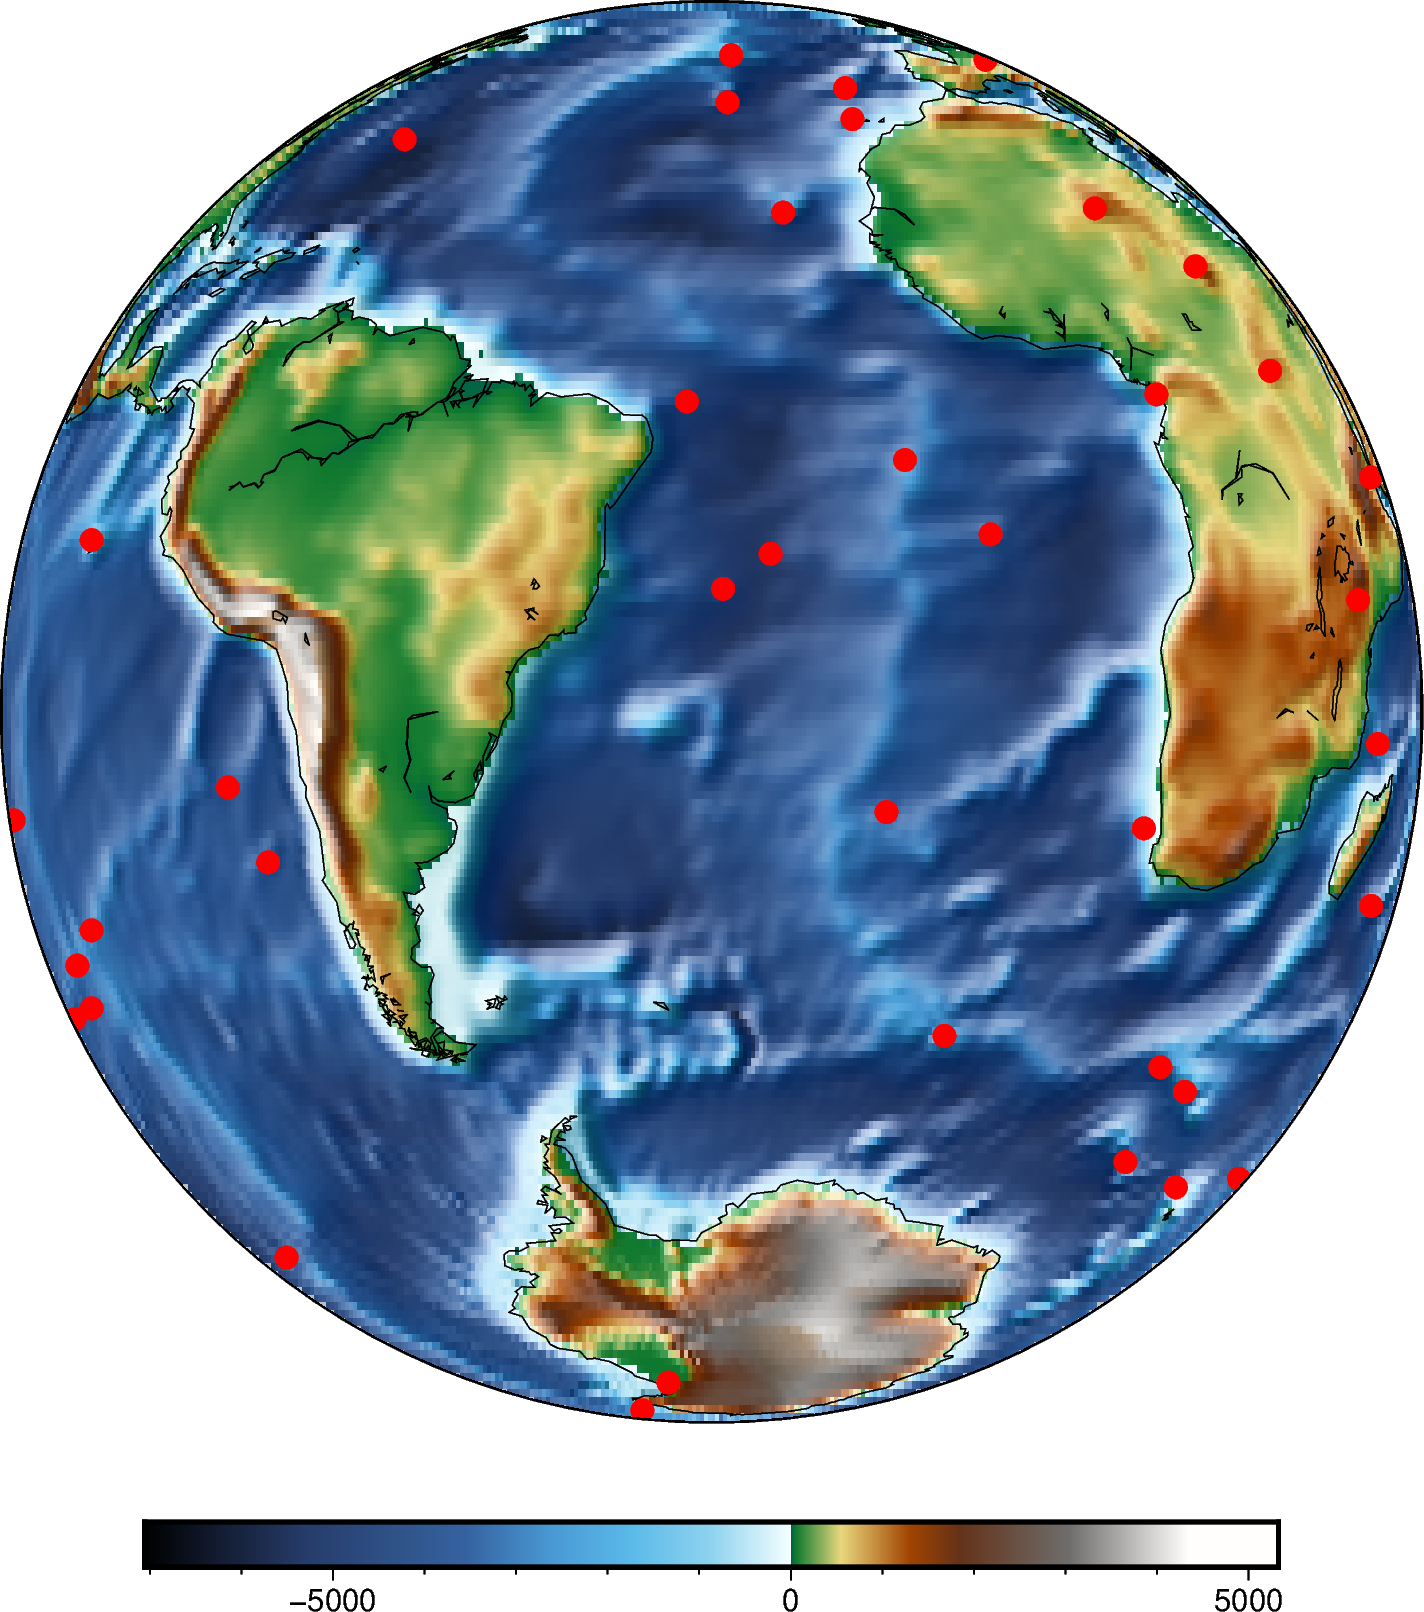

In [ ]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

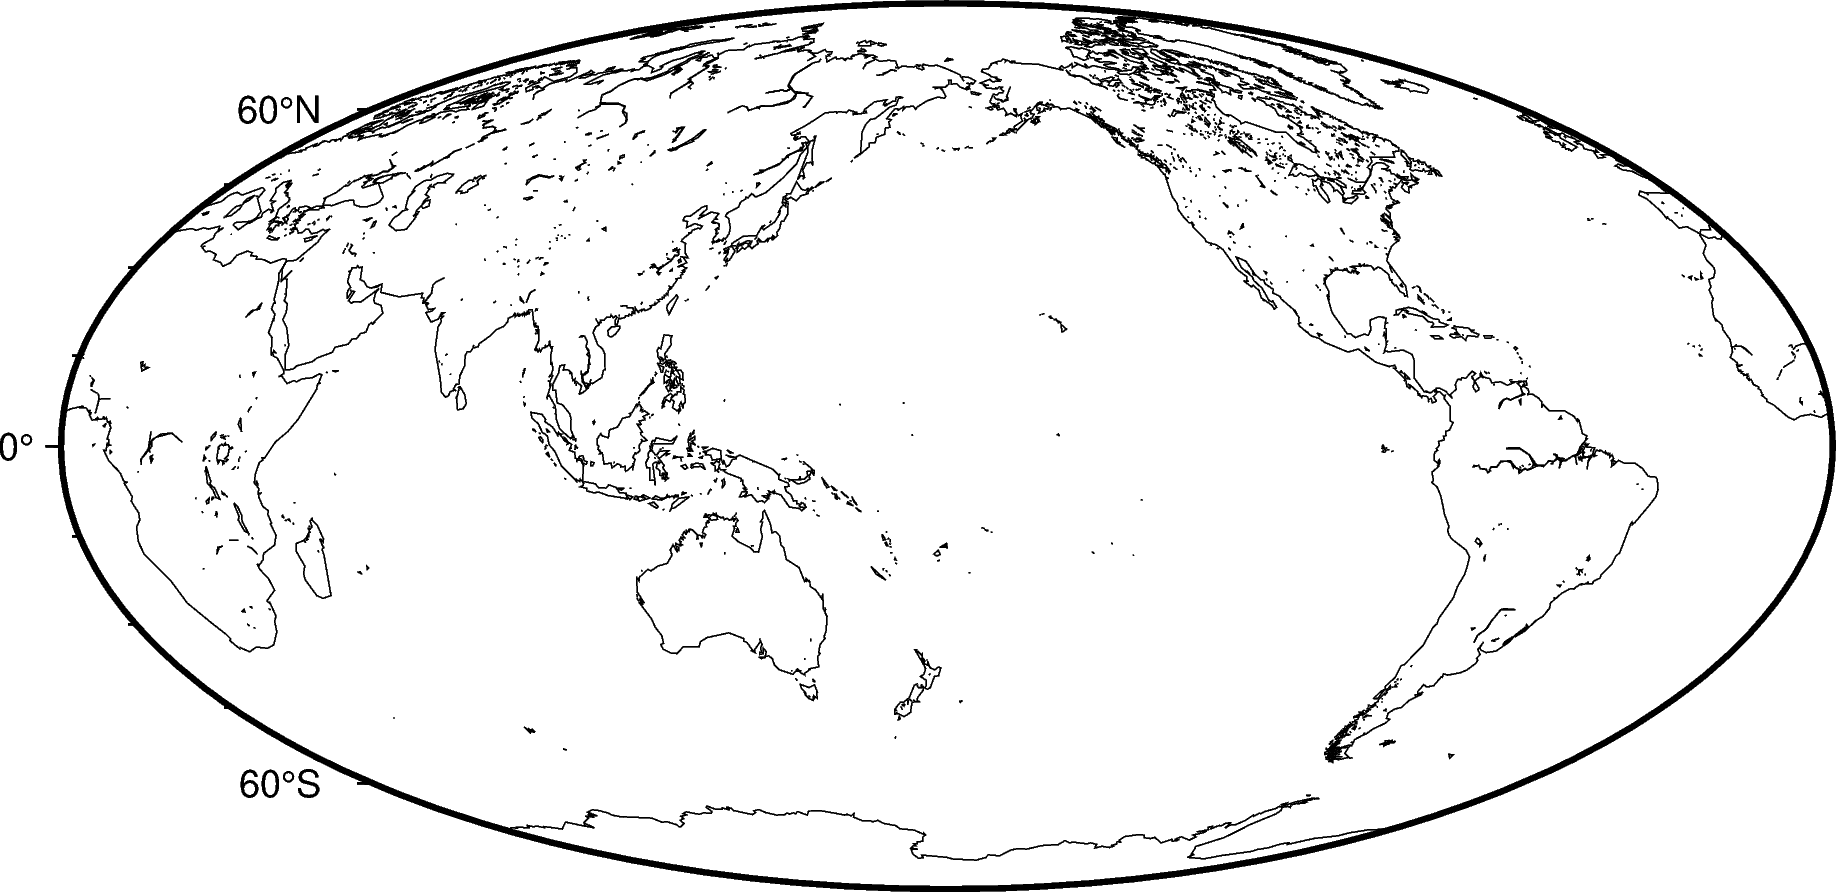

In [ ]:
fig = pygmt.Figure()
fig.basemap(region="g", projection="W15c", frame=True)
fig.coast(shorelines=True)
fig.show()

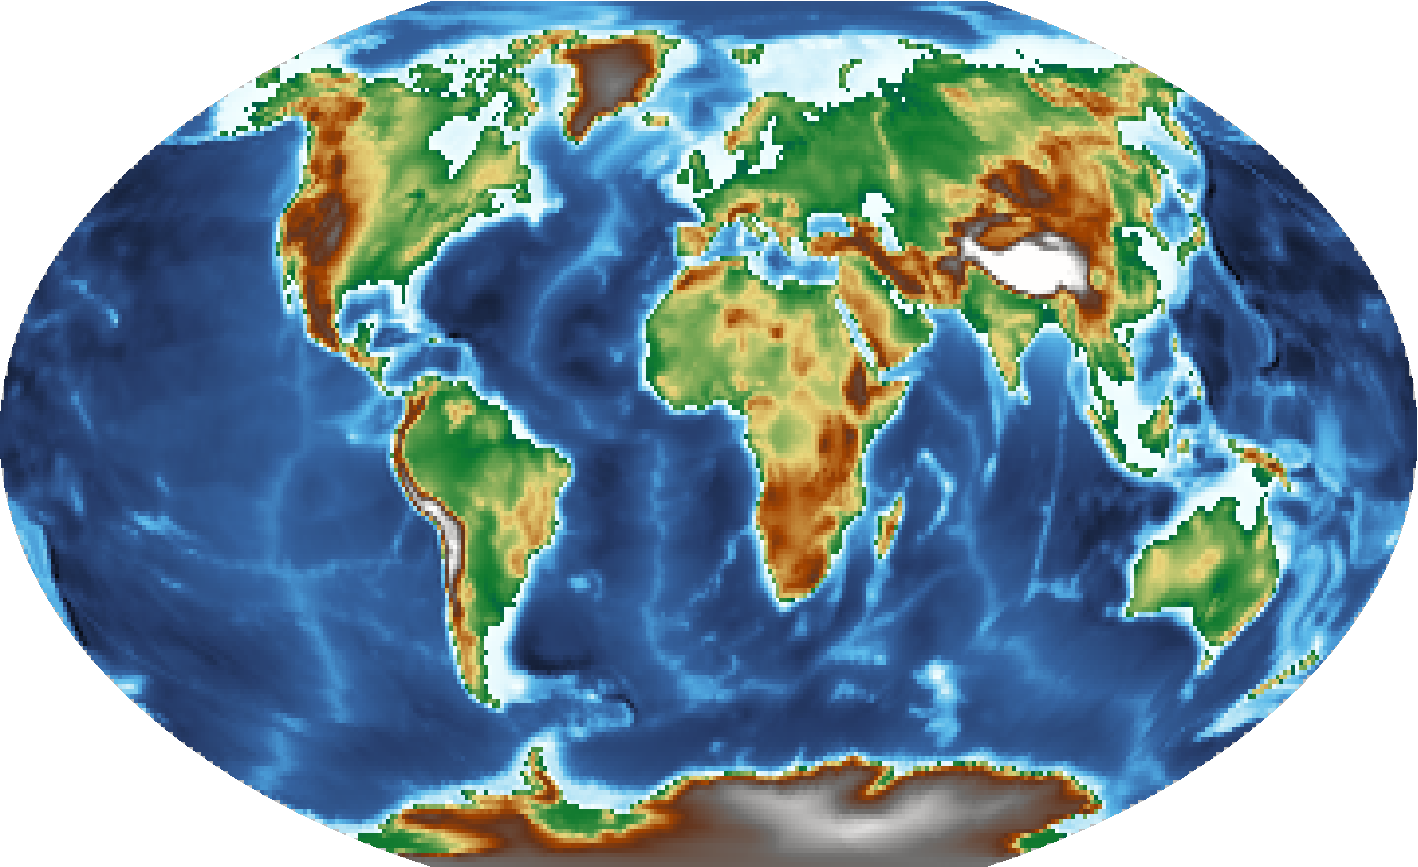

In [ ]:
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="R12c", cmap="geo")
fig.show()

Download complete. Generating map...


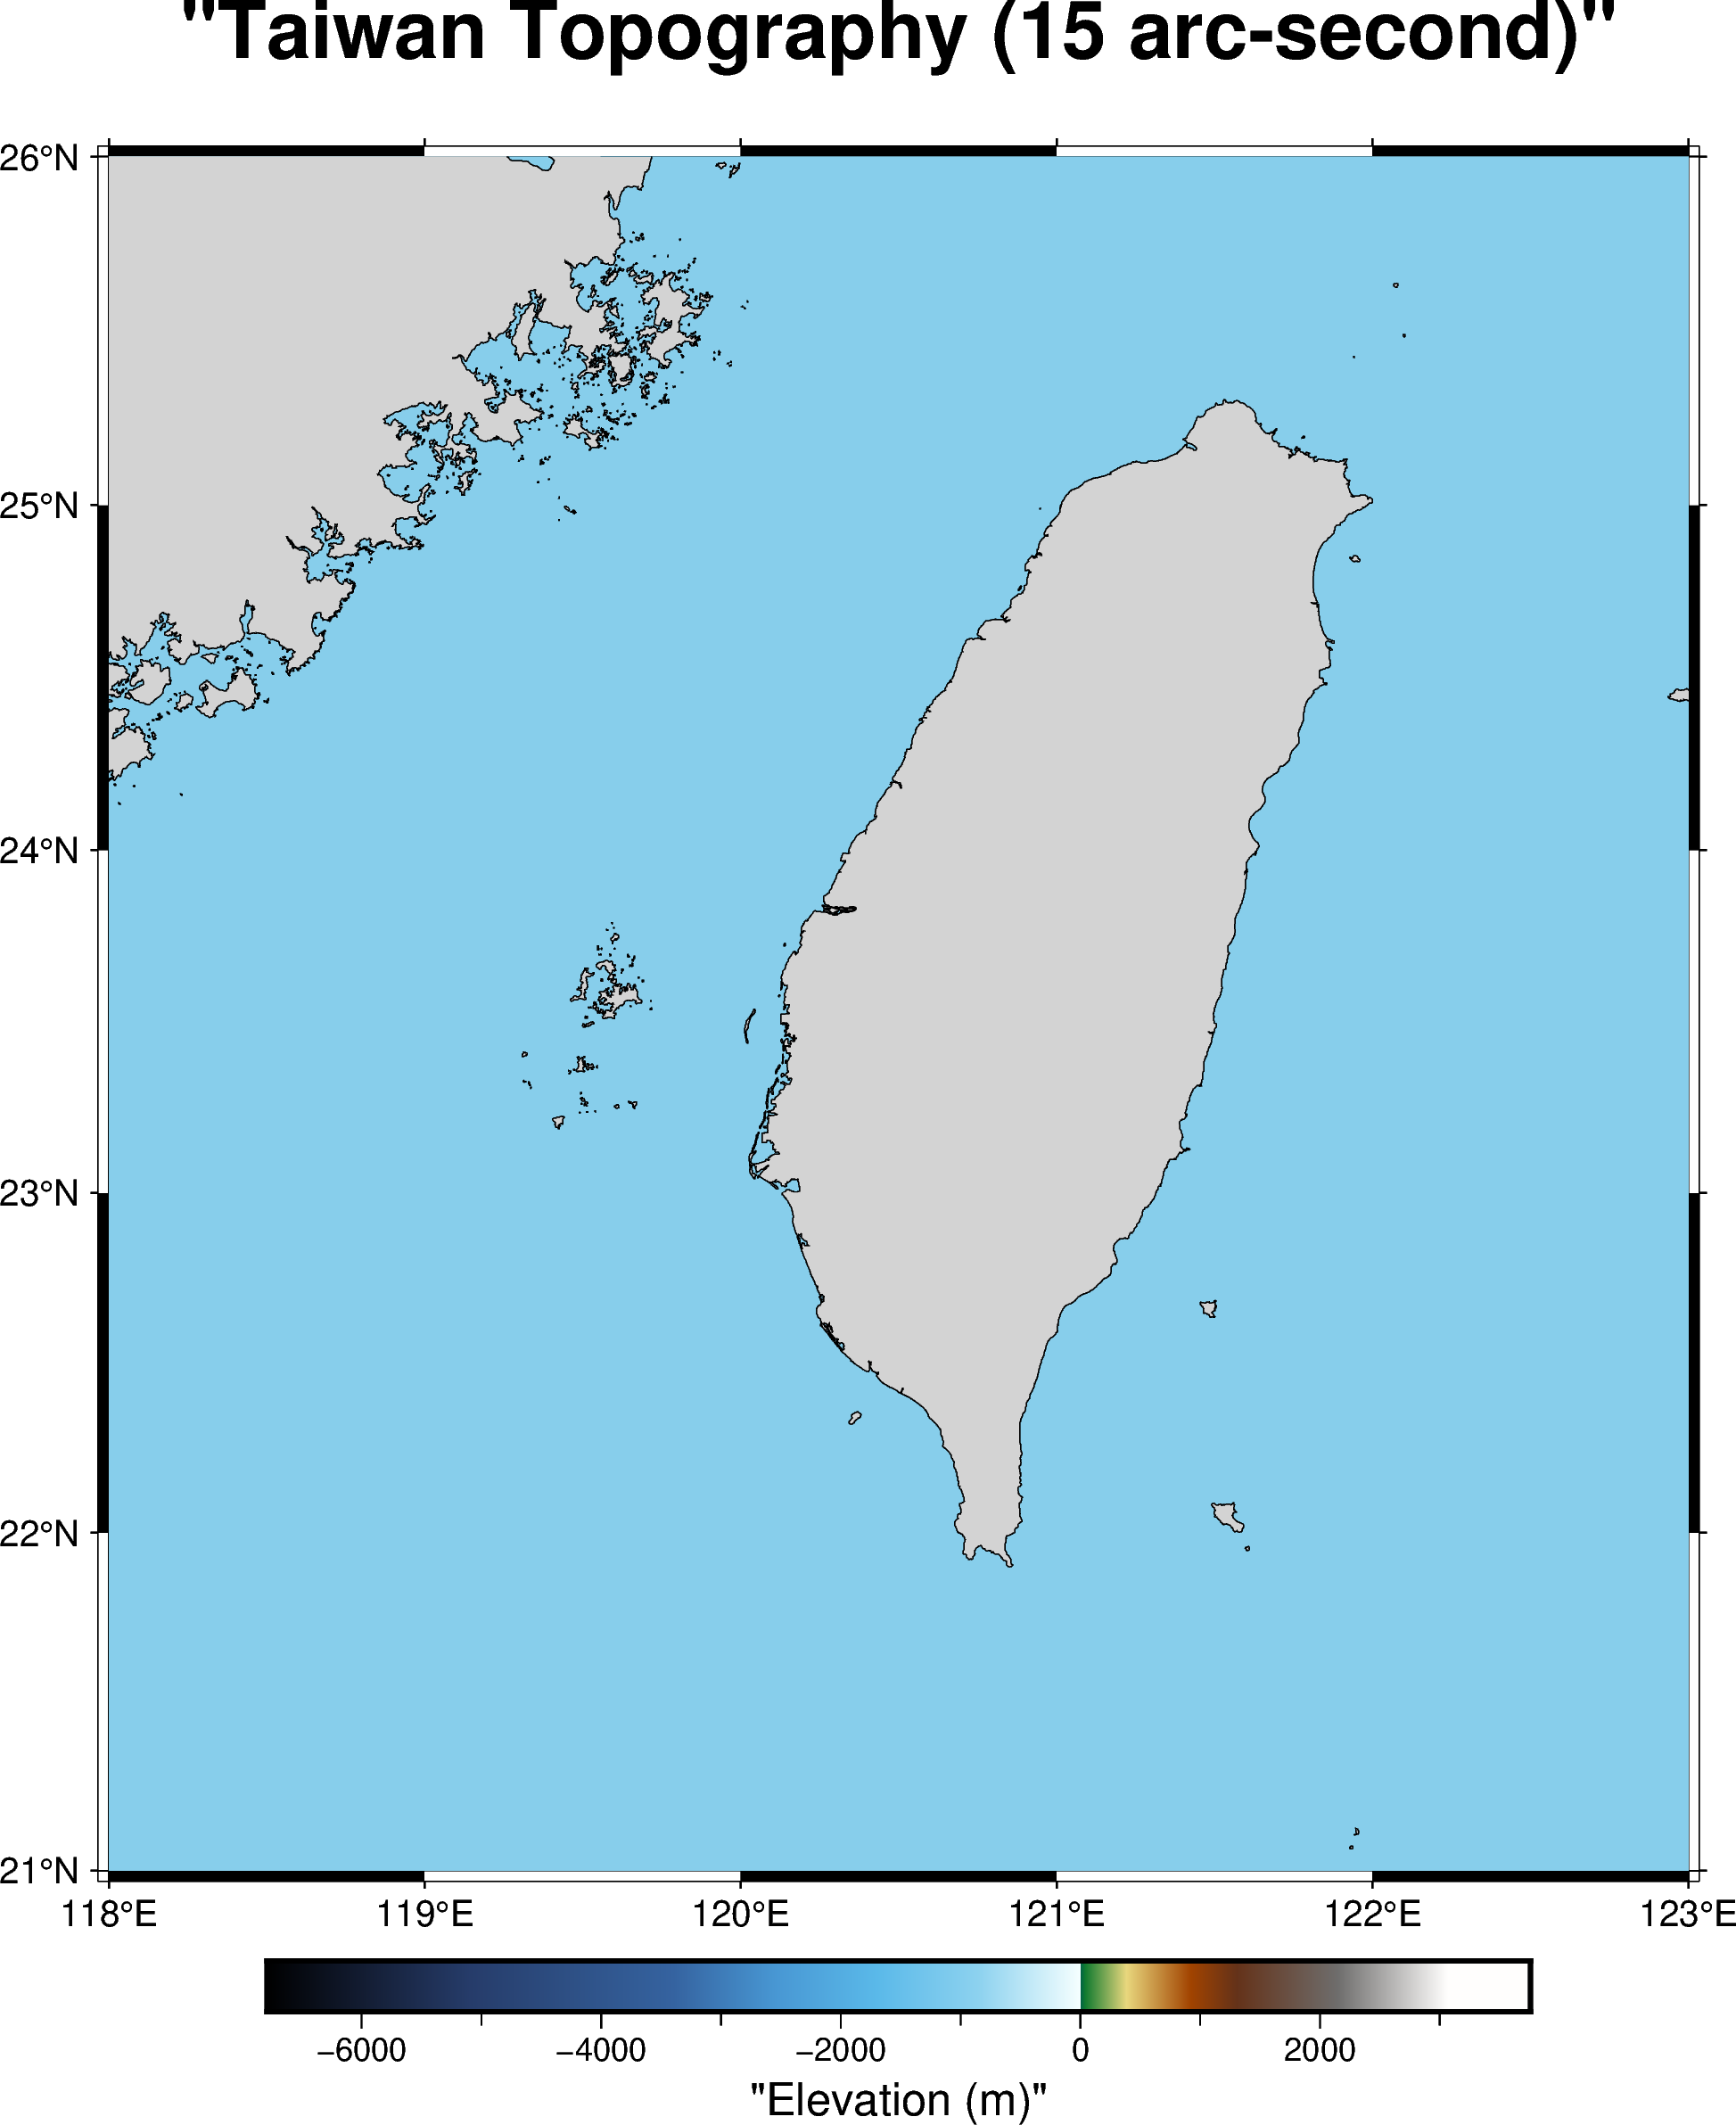

In [ ]:
import pygmt

# Define the region for Taiwan more precisely for the high-resolution data load
taiwan_region = [118, 123, 21, 26]  # Longitude and Latitude for Taiwan

# Load a higher resolution earth relief grid specifically for the Taiwan region.
# Using '15s' for 15 arc-seconds resolution, which requires the 'region' parameter.
# This might take a moment to download the data.
print("Downloading high-resolution earth relief data for Taiwan...")
taiwan_grid = pygmt.datasets.load_earth_relief(
    resolution="15s",
    region=taiwan_region, # Pass the region to load_earth_relief
    # It's good practice to specify data_source for high-res data if needed, e.g., 'igpp'
    # For '15s', 'igpp' is often the source for SRTM15+.
    # pygmt will usually pick the correct source, but explicit can avoid issues.
)
print("Download complete. Generating map...")

fig = pygmt.Figure()

# Use Mercator projection (M) with a width of 15cm for a good view of Taiwan
fig.basemap(
    region=taiwan_region, # Use the same region for basemap
    projection="M15c",
    frame=["a", "+t\"Taiwan Topography (15 arc-second)\""] # Add a title to the map
)

# Plot the terrain for Taiwan using the higher-resolution grid
# Apply the 'geo' colormap and shading for a pronounced topographical effect
fig.grdimage(grid=taiwan_grid, cmap='geo', shading=True)

# Add coastlines, borders, and water/land colors for context
fig.coast(shorelines=True, borders=[1, "thinnest,black"], water="skyblue", land="lightgray")

# Add a color bar to indicate elevation
fig.colorbar(frame=["a", "+L\"Elevation (m)\""])

fig.show()

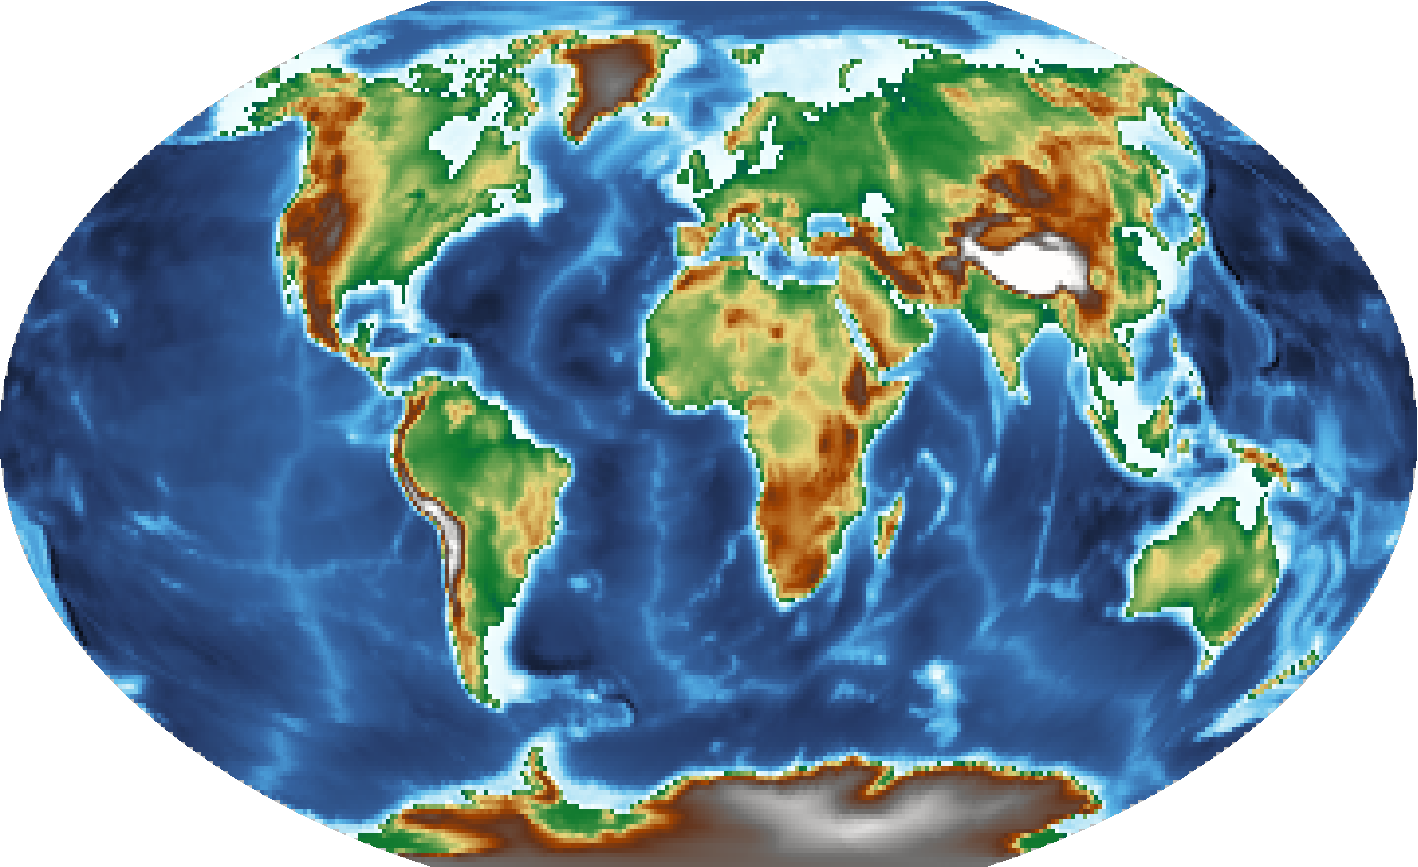

In [ ]:
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="R12c", cmap="geo")
print("Downloading high-resolution earth relief data for Taiwan...")
taiwan_grid = pygmt.datasets.load_earth_relief(
    resolution="15s",
    region=taiwan_region, # Pass the region to load_earth_relief
    # It's good practice to specify data_source for high-res data if needed, e.g., 'igpp'
    # For '15s', 'igpp' is often the source for SRTM15+.
    # pygmt will usually pick the correct source, but explicit can avoid issues.
)
fig.show()

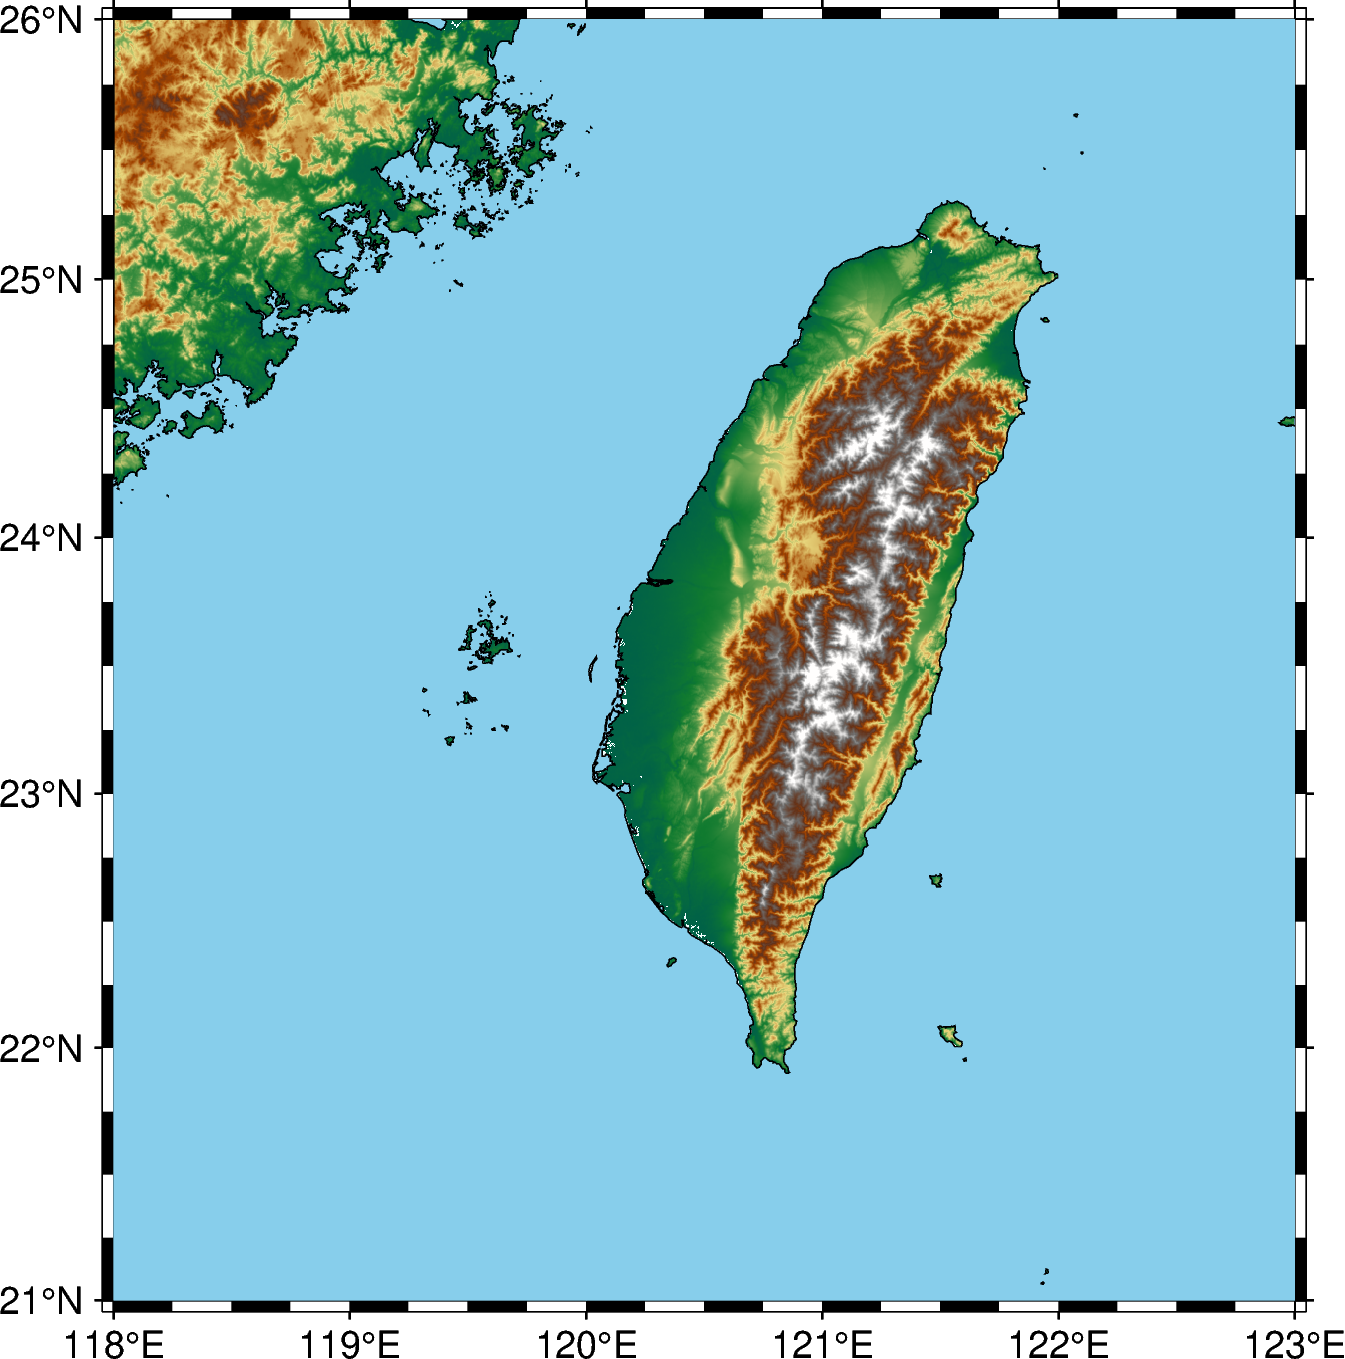

In [ ]:
import pygmt

# 建立圖形
fig = pygmt.Figure()

# 台灣地區經緯度範圍
region = [118, 123, 21, 26]

# 載入高解析度地形資料 (15秒解析度)
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)

# 繪出台灣地形圖
fig.grdimage(grid=grid, projection="M10c", cmap="geo", frame=True)

# 加上海岸線與國界
fig.coast(shorelines="0.25p,black", borders=[1], water="skyblue")

# 顯示結果
fig.show()


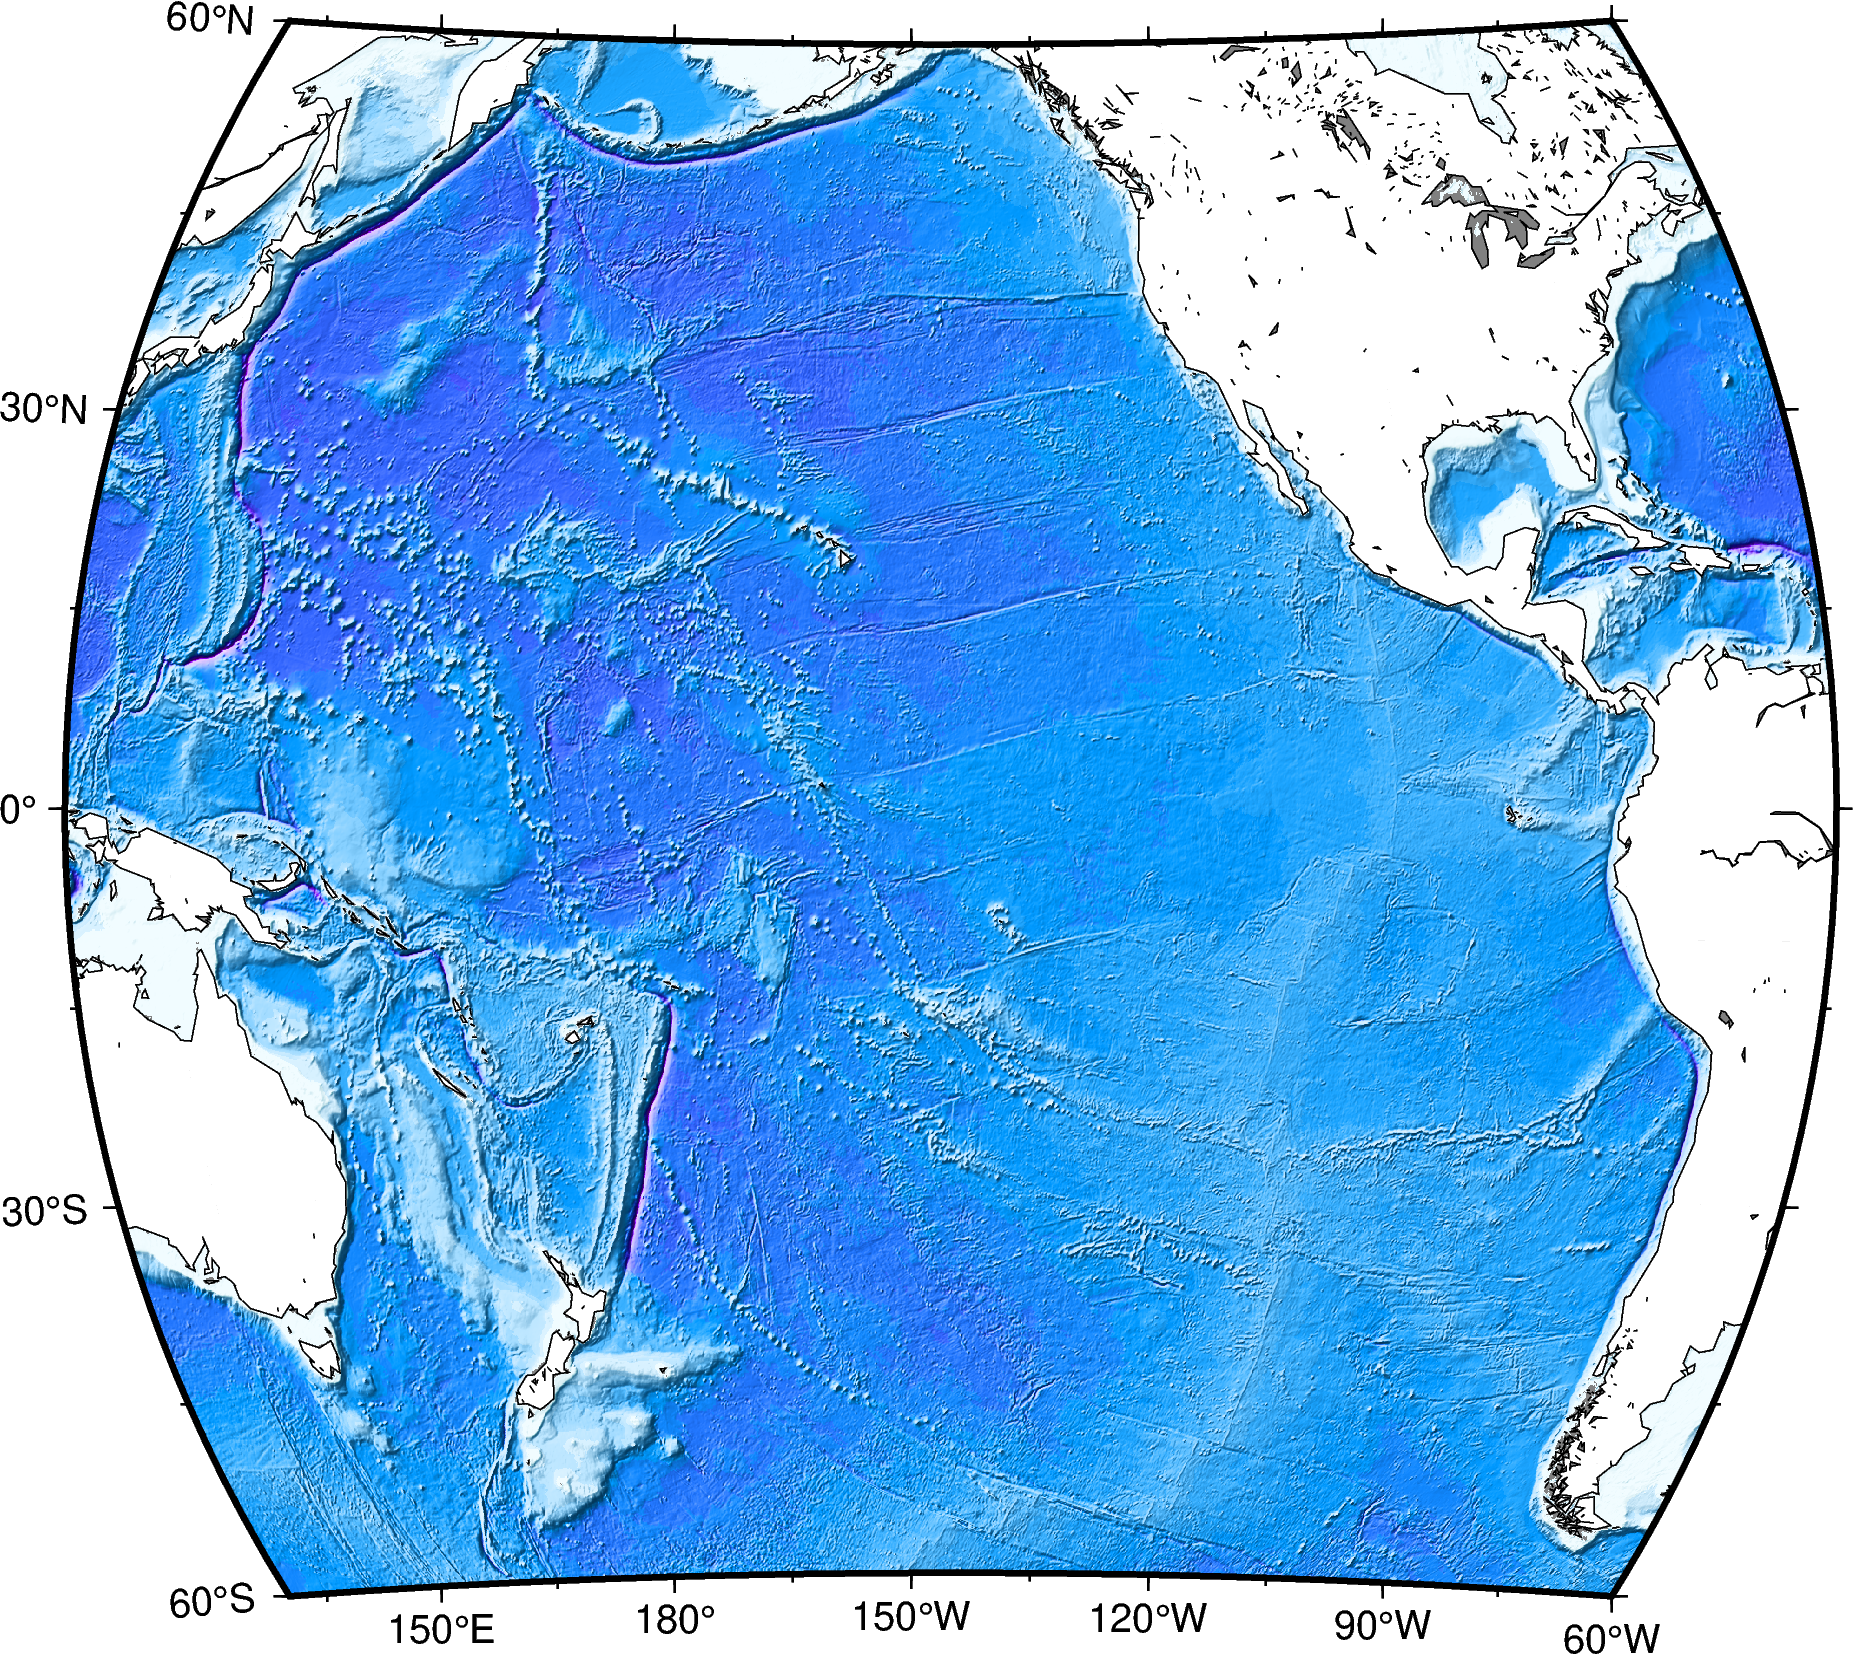

In [ ]:
import pygmt
import numpy as np

fig = pygmt.Figure()

# 太平洋範圍
region = [130, 300, -60, 60]

# 載入地形格網
grid = pygmt.datasets.load_earth_relief(resolution="05m", region=region)

# 只保留海洋部分
ocean_data = np.where(grid.data < 0, grid.data, np.nan)
ocean_only = grid.copy()
ocean_only.data = ocean_data

# 畫海底深度
fig.grdimage(
    grid=ocean_only,
    projection="R15c",
    cmap="globe",   # 或其他漸層色表
    shading=True    # 加陰影
)

# 畫陸地輪廓，不填顏色
fig.coast(
    shorelines="0.25p,black",
    land="white"  # 不填色
)

fig.basemap(frame=["a30f15", "WSen"])

# 用 matplotlib 顯示
fig.show()
